In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('gas_turbines.csv')

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# Performing EDA

In [4]:
df=df.drop("AFDP",axis=1) #Since problem statement is for ambient variables dropping unwanted headers.
df=df.drop("GTEP",axis=1)
df=df.drop("TIT",axis=1)
df=df.drop("TAT",axis=1)
df=df.drop("CDP",axis=1)
df=df.drop("CO",axis=1)
df=df.drop("NOX",axis=1)

In [5]:
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


# Train | Split dataset

In [7]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

A common mistake when configuring a neural network is to first normalize the data before splitting the data.

In [8]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [10]:
len(xtrain_scale)

10527

# Neural Network Modelling

Building the Model

In [11]:
# Create your first MLP in Keras
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 0.0770 - mse: 0.0770 - mae: 0.2134 - val_loss: 0.0457 - val_mse: 0.0457 - val_mae: 0.1543
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1558 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1503
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0467 - mse: 0.0467 - mae: 0.1566 - val_loss: 0.0452 - val_mse: 0.0452 - val_mae: 0.1538
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1563 - val_loss: 0.0443 - val_mse: 0.0443 - val_mae: 0.1516
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0453 - mse: 0.0453 - mae: 0.1568 - val_loss: 0.0435 - val_mse: 0.0435 - val_mae: 0.1522
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0441 - mse: 0.0441 - mae: 0.1568 - val_loss: 0.0428 - val_mse: 0.0428 - val_mae: 0.1552
Epoch 7/100
48/48 [===

48/48 [==============================] - 0s 4ms/step - loss: 0.0401 - mse: 0.0401 - mae: 0.1604 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1578
Epoch 52/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1585 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1584
Epoch 53/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1607 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1583
Epoch 54/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1589 - val_loss: 0.0405 - val_mse: 0.0405 - val_mae: 0.1622
Epoch 55/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1600 - val_loss: 0.0407 - val_mse: 0.0407 - val_mae: 0.1589
Epoch 56/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1588 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1593
Epoch 57/100
48/48 [=========

In [13]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation

In [14]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [15]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [16]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.039539,0.039539,0.156977,0.039717,0.039717,0.156782,95
96,0.039562,0.039562,0.157204,0.039912,0.039912,0.157043,96
97,0.039978,0.039978,0.158169,0.039826,0.039826,0.157104,97
98,0.039477,0.039477,0.157324,0.040268,0.040268,0.158412,98
99,0.039797,0.039797,0.159245,0.040121,0.040121,0.158309,99


# Visualize Training History

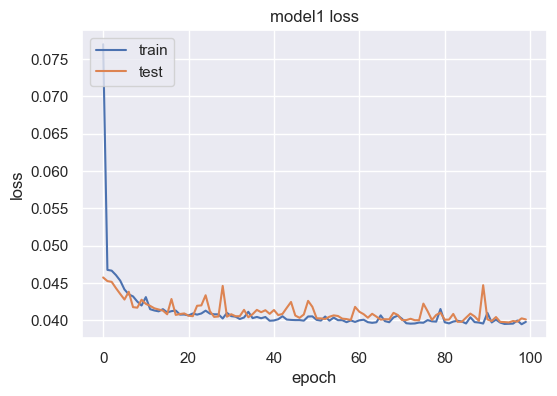

In [20]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

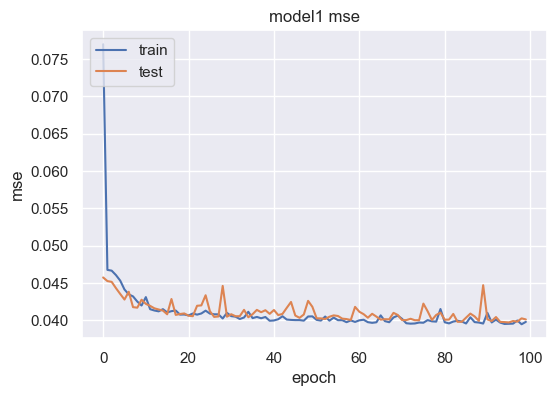

In [21]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 